Mobilenetv1的历史贡献是depth-wise separable convolutions（深度可分离卷积）在模型中的使用，以得到轻量级模型，能够部署在移动端或嵌入式设备，如下图所示。此外，引入了两个全局超参数，用于在延时与精度之间trade off。
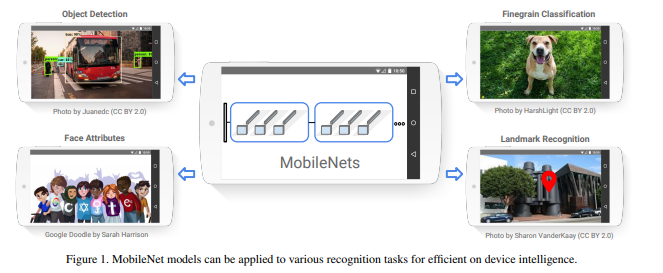

模型结构：<br/>
深度可分离卷积（depth-wise separable convolution）：深度可分离卷积属于factorized conv的一种，由一个depth-wise conv与一个point-wise(1x1 conv) conv组成。其中，depth-wise conv在每个输入channel上应用一个单维的filter, point-wise conv应用1x1卷积联合depth-wise conv的输出。Depth-wise conv极大地减少了计算量与模型尺寸，而point-wise conv用于计算depth-wise输出的线性组合，从而产生新的特征。标准卷积、depth-wise conv与1x1 point-wise conv的卷积核如下图所示。
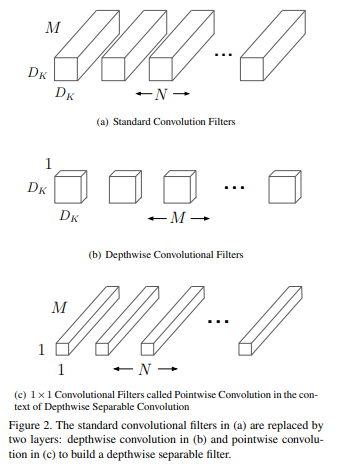

$标准卷积层接收D_F * D_F * M的feture map F，产生D_F * D_F * N的特征图G，其中D_F是方形\\特征图的宽与高，M是输入维度，D_G是方形输出特征图的宽高,N是输出维度。则标准卷积的参\\数量为D_K * D_K * M * N，其中D_K是卷积核宽高，计算量为D_K * D_K * M * N * D_F * D_F。\\
Depth-wise卷积的计算量为：D_K * D_K * M * D_F * D_F，1x1 point-wise conv用于产生新的\\特征。depth-wise separable conv总的计算量为：D_K * D_K * M * D_F * D_F + M * N * \\D_F * D_F。\\
则深度可分离卷积与标准卷积之间的比值为：$<br/>
$$
\frac{D_K * D_K * M * D_F * D_F + M * N * D_F * D_F}{D_K * D_K * M * N * D_F * D_F} = \frac{1}{N} + \frac{1}{D_K^2}
$$
$Mobilenet用3x3深度可分离卷积，也就是计算量减少8到9倍。$

网络结构与训练：Mobilenet结构建立在深度可分离卷积上，除了第一层之外。这样简单的结构便于我们对网络进行缩放。Mobilenet结构如表1所示，共28层。图3对比了一个标准卷积与深度可分离卷积。<br/>
模型的计算量大多集中在1x1卷积上，这个可以通过GEMM来实现。mobilenet的计算量有95%集中在1x1卷积上，另外有75%的参数量在1x1卷积上，如表2所示。<br/>
训练时，用RMSprop，没有采用太多正则化手段。
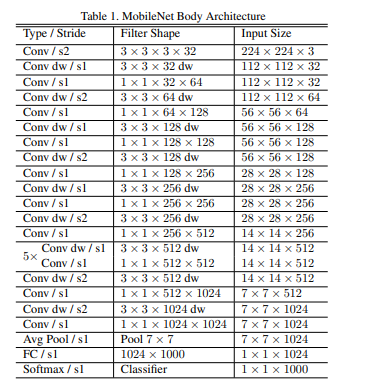

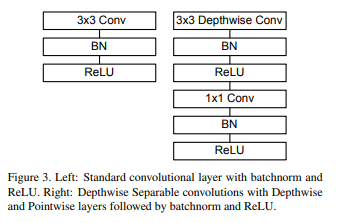

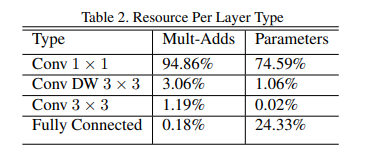

$width multiplier: thinner models。为了构建更小的网络，我们引入一个简单的参数叫做\\width multiplier，用于统一地减小模型。对于一个给定的width multiplier \alpha，输入维\\度变为 \alpha M，输出维度变为\alpha N。\alpha的取值一般设为1, 0.75,0.5,0.25。$

resolution multiplier:减少特征图尺寸。分辨率乘子 $\rho$ 一般应用于输入层，实际应用中，将输入尺寸缩减$\rho$倍，特征图尺寸会相应缩减$\rho$倍。输入为224x224，相当于$\rho$为1，经典设置为：224，192，160，128.